# КТ-1

Томашук Анна Э-2109

In [46]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
df = pd.read_csv('city_united.csv')

In [69]:
df.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30


Признак-результат (у): Quality of Life Index
Признаки-факторы (Х): остальные столбцы

In [73]:
# первым шагом проверим дубликаты
df.duplicated().sum()

0

Их нет, идем дальше

In [74]:
# посмотрим на пропущенные значения
df.isna().sum()

UA_Name                  0
UA_Country               0
UA_Continent             0
Housing                  0
Cost of Living           0
Startups                 0
Venture Capital          0
Travel Connectivity      0
Commute                  0
Business Freedom         0
Safety                   0
Healthcare               0
Education                0
Environmental Quality    0
Economy                  0
Taxation                 0
Internet Access          0
Leisure & Culture        0
Tolerance                0
Outdoors                 0
Quality of Life Index    0
dtype: int64

Пропущенные значения также отсутствуют. Перейдем к кодировки категориальных переменных. Для этого выясним, какие переменные у нас количественные, а какие - категориальные.

In [75]:
df.dtypes

UA_Name                   object
UA_Country                object
UA_Continent              object
Housing                  float64
Cost of Living           float64
Startups                 float64
Venture Capital          float64
Travel Connectivity      float64
Commute                  float64
Business Freedom         float64
Safety                   float64
Healthcare               float64
Education                float64
Environmental Quality    float64
Economy                  float64
Taxation                 float64
Internet Access          float64
Leisure & Culture        float64
Tolerance                float64
Outdoors                 float64
Quality of Life Index    float64
dtype: object

In [76]:
# разобьем 
catigorial = ['UA_Name','UA_Country','UA_Continent']
numerical = [value for value in df.columns if value not in catigorial]

In [77]:
len(df['UA_Name'].unique())

184

In [78]:
len(df['UA_Country'].unique())

111

In [79]:
len(df['UA_Continent'].unique())

6

Так как уникальных значений по категориальным переменным немного, что используем метод One-hot encoding, который создаст для каждого уникального значения столбец, заполненный 0 или 1. или просто воспользуемся get_dummies, результаты будут одинаковыми.

In [80]:
df = pd.get_dummies(df)
df.head()

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,...,UA_Country_ Vietnam,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
0,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,...,0,0,0,0,0,0,0,0,1,0
1,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,6.5225,6.677333,7.1165,...,0,0,0,0,0,0,0,1,0,0
2,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,...,0,0,0,0,0,0,1,0,0,0
3,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,8.2230,8.078333,4.7560,...,0,0,0,0,0,0,0,0,1,0
4,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,5.3475,6.432333,3.6245,...,0,0,0,0,0,0,0,1,0,0


Посмотрим на качество на данном этапе

In [142]:
X = df.drop(["Quality of Life Index"], axis=1)
y = df[["Quality of Life Index"]]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [143]:
reg = LinearRegression().fit(train_X, train_y)

In [144]:
reg.score(train_X, train_y)

0.986690568040988

In [145]:
reg.score(test_X, test_y)

-3.3185738146912247e+23

Предыдущие преобразования несильно улучшили наши данные. Продолжим работу

Создадим полиномиальные признаки 2ого порядка для наших данных и нормализуем их

In [146]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform(X)

train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out())
test_X = pd.DataFrame(poly.fit_transform(test_X), columns=poly.get_feature_names_out())

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)
test_X_st = scaler.fit_transform(test_X)

In [148]:
reg = LinearRegression().fit(train_X_st, train_y)

In [149]:
reg.score(test_X_st, test_y)

-5.725145080566852e+24

Попробуем отобрать признаки, используя F-тест.

In [150]:
from sklearn.feature_selection import f_regression, SelectKBest

f_statistic, p_values = f_regression(train_X_st, train_y)

C:\Users\An_to\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [163]:
selector = SelectKBest(f_regression, k=10)

train_X = pd.DataFrame(selector.fit_transform(train_X_st, train_y), columns = selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_X_st), columns = selector.get_feature_names_out())

C:\Users\An_to\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\An_to\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [164]:
reg = LinearRegression().fit(train_X, train_y)

In [166]:
reg.score(train_X, train_y)

0.807156309142693

In [165]:
reg.score(test_X, test_y)

0.822850208043471

Получили достаточно высокий коэффициент детерминации - 0.823.

In [167]:
predictions = reg.predict(test_X)

print(f'MSE: {mean_squared_error(test_y, predictions)}')
print('R2 Score:', r2_score(test_y, predictions))

MSE: 222.70960695267186
R2 Score: 0.822850208043471


* Была идея посмотреть распределение получившихся данных. Если логнормальное, то может прологарифмировать и применить преобразование Бокса-Кокса. Это могло бы улучшить качество модели.

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
X = train_X + test_X

array([[<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x2212'}>],
       [<AxesSubplot:title={'center':'x2214'}>,
        <AxesSubplot:title={'center':'x2216'}>,
        <AxesSubplot:title={'center':'x2221'}>],
       [<AxesSubplot:title={'center':'x2837'}>,
        <AxesSubplot:title={'center':'x3454'}>,
        <AxesSubplot:title={'center':'x3455'}>],
       [<AxesSubplot:title={'center':'x3459'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

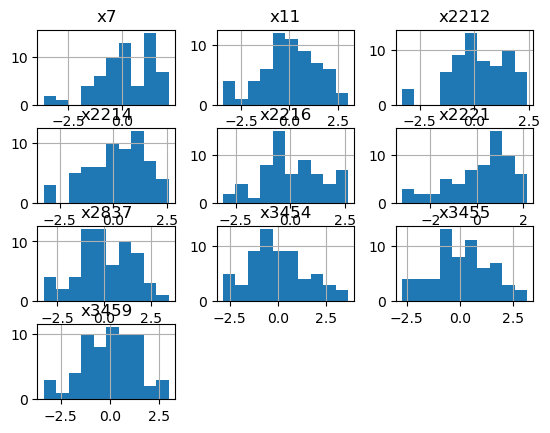

In [174]:
X.hist()

Как видно из графиков ни одно распределение не напоминает логнормальное. Почти все графики больше напоминают нормальное, а значит - не требуют преобразований.

### Таким образом, было получено максимальное качество на тестовых данных (0.823)